# IDRNN
[Description]
(Add description here)

The goal of the project:
1. palceholder
2. placeholder


# Dataset

First download the dataset.

# Packages

In [1]:
# !pip3 install -r requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from tqdm import tqdm
from torch.utils.data import  Dataset, DataLoader
import torch.nn.functional as F



# load data and print it

In [3]:
# from dataloader import ProteinDataset, proteinread
from dataloader import AminoAcidDataset

In [4]:
# Replace this path with the actual path to your input CSV file
input_csv_file = "data.csv"

# # Create an instance of the ProteinDataset
# train_data, seq_length = proteinread(input_csv_file)

# # Create dataset instances for training and validation
# train_data = ProteinDataset(train_data)

# # Create data loaders for training and validation
# batch_size = 1  # You can adjust this batch size
# train_dataset = DataLoader(train_data, batch_size=batch_size, shuffle=True)

max_sequence_length = 1000
num_amino_acids = 20

dataset = AminoAcidDataset(input_csv_file, max_sequence_length, num_amino_acids)

# Create a DataLoader
batch_size = 128
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate through the DataLoader
# for batch in dataloader:
#     print("Batch shape:", batch.shape)
#     print("Batch data:", batch)
#     break



In [5]:
# pick up one sequence to show how our data looks like
g, g_len, target = dataset[65]
print(g)
print(g_len)
print(target)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
tensor([100])
tensor([ 6, 12, 15, 15,  9, 14,  8,  6, 10,  8,  7,  6,  1,  8, 15, 12, 12, 12,
        15, 12,  5, 12,  9,  5, 19, 15, 15, 17,  5, 16, 12, 17,  5,  0, 12,  9,
        15, 12, 17,  9,  2, 12,  0, 14, 15,  6, 15, 15, 16,  9, 15, 12, 13, 17,
        16, 11,  9, 11,  3, 18, 19, 17,  1, 13,  0, 15,  5,  0, 12, 15,  6,  9,
         6, 16, 12, 15, 15, 11,  5, 16, 16, 15,  3, 16,  3,  2,  3,  3,  7, 19,
         5, 11, 12,  3, 17, 17, 14, 16,  7,  6, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 

In [6]:

# Create an empty list to store the numerical sequences
training_sequences = []
# Iterate over the training_dataset
for sample in dataset:
    # Extract the numerical part (the first element of the tuple) and append it to the list
    training_sequences.append(sample[0])

# Print the list of training sequences
print(training_sequences[65])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [7]:
print(training_sequences)

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]]), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]]), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]]), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0., 

# Helper function and calculation (kld reconstruct loss) and printer form tuorial 6

In [8]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [9]:
## Help function from tutroial 6 to calculate loss and plotting

def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    return total_params
def plot_losses(reco_losses, kld_losses):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(reco_losses)
    ax.set_title('Reconstruction Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(kld_losses)
    ax.set_title('KLD Loss')



# trainning loop based on tutorial 6

In [10]:
from model_VAE import VAECNN

latent_dim = 512

vae = VAECNN(input_size=21, output_size=21, latent_dim=latent_dim)

if torch.cuda.is_available():
    vae.cuda()

In [11]:
print(f'VAE has {count_parameters(vae):,} trainable parameters')

VAE has 263,871 trainable parameters


In [12]:

optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

beta = 0 # Weight of the KL divergence term
alpha = 1 # weight for cross entropy loss

def vae_loss(recon_x, target, mu, logvar):
    # Reconstruction loss
    recon_loss = []
    for batch in range(recon_x.shape[0]):
        recon_batch = recon_x[batch, :, :]
        target_batch = target[batch, :]
        # print(recon_batch.shape, target_batch.shape)
        cross_entropy_loss = F.cross_entropy(input=recon_batch.squeeze(0), target=target_batch.squeeze(0), reduction='mean')
        # print(cross_entropy_loss)
        recon_loss.append(cross_entropy_loss)
    recon_loss = torch.mean(torch.stack(recon_loss)) # stack the tensor to tensor list
    
    # Regularization term (KL divergence)
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    # Combine reconstruction loss and regularization term
    total_loss = (beta * kl_divergence) + (alpha * recon_loss)
    
    return kl_divergence, recon_loss, total_loss

num_epochs = 20
num_batches = len(dataloader)

total_losses = []
reco_losses = []
kld_losses  = []

for epoch in tqdm(range(num_epochs)):
    vae.train()
    temp_total_loss = 0
    temp_reco_loss = 0
    temp_kld_loss = 0
    
    
    for seq_batch, length_batch, target_batch in dataloader:
        if torch.cuda.is_available():
            seq_batch = seq_batch.cuda()
            length_batch = length_batch.cuda()
            target_batch = target_batch.cuda()
        optimizer.zero_grad()
        
        recon_batch, mean, logvar = vae(seq_batch)
        kld_loss, reco_loss, total_loss = vae_loss(recon_batch, target_batch, mean, logvar)
        
        temp_total_loss += total_loss
        temp_kld_loss += kld_loss
        temp_reco_loss += reco_loss
    
        total_loss.backward()
        optimizer.step()

    total_losses.append(total_loss.item())
    reco_losses.append(reco_loss.item())
    kld_losses.append(kld_loss.item())
    print(total_losses[epoch],  min(total_losses))
    if epoch == 0 or total_losses[epoch] <= min(total_losses):
        torch.save(vae.state_dict(), "vae_model.pt")
        print("Model saved")
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")


  5%|▌         | 1/20 [00:12<03:53, 12.29s/it]

0.5729835629463196 0.5729835629463196
Model saved
Epoch [1/20], Loss: 0.5730


 10%|█         | 2/20 [00:22<03:22, 11.27s/it]

0.2654041051864624 0.2654041051864624
Model saved
Epoch [2/20], Loss: 0.2654


 15%|█▌        | 3/20 [00:34<03:10, 11.23s/it]

0.012942668050527573 0.012942668050527573
Model saved
Epoch [3/20], Loss: 0.0129


 20%|██        | 4/20 [00:45<02:59, 11.23s/it]

0.002707466948777437 0.002707466948777437
Model saved
Epoch [4/20], Loss: 0.0027


 25%|██▌       | 5/20 [00:56<02:48, 11.21s/it]

0.0012093042023479939 0.0012093042023479939
Model saved
Epoch [5/20], Loss: 0.0012


 30%|███       | 6/20 [01:07<02:37, 11.24s/it]

0.0005995883839204907 0.0005995883839204907
Model saved
Epoch [6/20], Loss: 0.0006


 35%|███▌      | 7/20 [01:18<02:26, 11.23s/it]

0.0004697219410445541 0.0004697219410445541
Model saved
Epoch [7/20], Loss: 0.0005


 40%|████      | 8/20 [01:30<02:14, 11.22s/it]

0.0004177241353318095 0.0004177241353318095
Model saved
Epoch [8/20], Loss: 0.0004


 45%|████▌     | 9/20 [01:41<02:02, 11.11s/it]

0.00031157571356743574 0.00031157571356743574
Model saved
Epoch [9/20], Loss: 0.0003


 50%|█████     | 10/20 [01:51<01:49, 10.90s/it]

0.0002594013640191406 0.0002594013640191406
Model saved
Epoch [10/20], Loss: 0.0003


 55%|█████▌    | 11/20 [02:01<01:36, 10.72s/it]

0.00015976891154423356 0.00015976891154423356
Model saved
Epoch [11/20], Loss: 0.0002


 60%|██████    | 12/20 [02:12<01:24, 10.60s/it]

0.00010419103637104854 0.00010419103637104854
Model saved
Epoch [12/20], Loss: 0.0001


 65%|██████▌   | 13/20 [02:22<01:13, 10.50s/it]

0.00025146963889710605 0.00010419103637104854
Epoch [13/20], Loss: 0.0003


 70%|███████   | 14/20 [02:32<01:02, 10.49s/it]

5.7365123211639e-05 5.7365123211639e-05
Model saved
Epoch [14/20], Loss: 0.0001


 75%|███████▌  | 15/20 [02:43<00:52, 10.47s/it]

4.93579100293573e-05 4.93579100293573e-05
Model saved
Epoch [15/20], Loss: 0.0000


 80%|████████  | 16/20 [02:53<00:41, 10.40s/it]

2.4292254238389432e-05 2.4292254238389432e-05
Model saved
Epoch [16/20], Loss: 0.0000


 85%|████████▌ | 17/20 [03:03<00:31, 10.42s/it]

2.9128807000233792e-05 2.4292254238389432e-05
Epoch [17/20], Loss: 0.0000


 90%|█████████ | 18/20 [03:14<00:21, 10.51s/it]

4.6092438424238935e-05 2.4292254238389432e-05
Epoch [18/20], Loss: 0.0000


 95%|█████████▌| 19/20 [03:25<00:10, 10.47s/it]

1.9674234863487072e-05 1.9674234863487072e-05
Model saved
Epoch [19/20], Loss: 0.0000


100%|██████████| 20/20 [03:35<00:00, 10.77s/it]

0.4016793370246887 1.9674234863487072e-05
Epoch [20/20], Loss: 0.4017


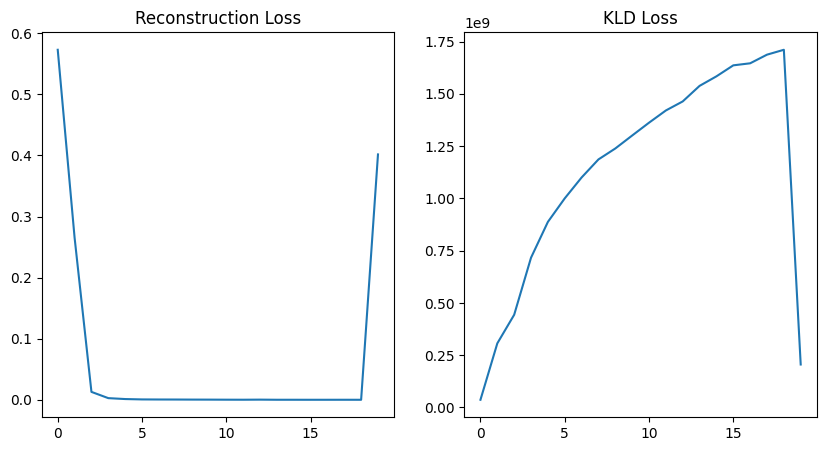

In [13]:

plot_losses(reco_losses, kld_losses)

Test an example

In [14]:

# Function to convert one-hot encoding to amino acid sequences
net = VAECNN(input_size=21, output_size=21, latent_dim=latent_dim)

net.load_state_dict(torch.load('vae_model.pt',map_location=torch.device('cpu')))

def one_hot_to_sequence(one_hot):
    _, max_indices = torch.max(one_hot, dim=1)
    amino_acids = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y", ""]
    sequences = []
    for indices in max_indices:
        sequence = "".join([amino_acids[idx] if idx < len(amino_acids) else '-' for idx in indices if idx != 0])
        sequences.append(sequence)
    return sequences

# Test the trained model on an example from the training dataset
test_batch_size = 1  # Set batch size for testing
test_dataloader = DataLoader(dataset, batch_size=test_batch_size, shuffle=True)

# Retrieve an example from the test dataset
example_seq, example_len, example_target = next(iter(test_dataloader))

# Set the model to evaluation mode
net.eval()

# Perform inference on the example
with torch.no_grad():
    recon_output, _, _ = net(example_seq)
    recon_output = torch.softmax(recon_output.permute(0,2,1), dim=1)

# Convert the output to amino acid sequences
amino_acid_sequences = one_hot_to_sequence(recon_output)

# Print the reconstructed sequences
for i, sequence in enumerate(amino_acid_sequences):
    print(f"Example {i+1}: {sequence}")

Example 1: YYSGLLKVSEGSKTCDTMVFNHPIKKFLESPSRSSSPNQRETPSNHSESDSLSQHNDFLSDKDNNSNMDIEERLSNNMEQRPSRNTGRDTSRITGSHKTEQRNDLTDETSRLFVK


In [15]:
original_input = one_hot_to_sequence(example_seq.transpose(1,2))
for i, sequence in enumerate(original_input):
    print(f"Original {i+1}: {sequence}")

Original 1: YYSGLLKVSEGSKTCDTMVFNHPIKKFLESPSRSSSPNQRETPSNHSESDSLSQHNDFLSDKDNNSNMDIEERLSNNMEQRPSRNTGRDTSRITGSHKTEQRNDLTDETSRLFVK


# Sequence Generation

In [24]:
num_seq = 12
max_sequence_length = 1000

samp = net.generate_sequence(num_seq, max_sequence_length)
for i, sequence in enumerate(one_hot_to_sequence(samp)):
    print(f"Generated {i+1}: {sequence}")


Generated 1: DYFPVPPPCGYHHCNCHGDDCEPPGHNQKVDVGSCGRKVFITQDLYGPPVDWCVCGVFHPPQGGHGWYDCYVGQCYNTGQHQFGVHPPEHNLEGHQGWSGGLVDCHEDGVQPVEPVQVWGFRGHGHGGCRMKRFVQEVGFHHCTHCDGVQGGCWPHDHYDCVNLWVHNNPGYEGGEPWNFQFCVDQNWHLHDPLTGEHELGFPQPHPNGCPSDMHCGHVGWGYCHKVDVQHDDHVFPGDFQKNDHGHGPPFPVFPGVHTVHHGSQDCRVGMVPRFPPGQHIMHQGQGEQPCGTHVYDGIMVEPPPPEVMDCEQERQQDQFGQNFVHPGGYDQCMLVPGHDGVEPPGQVTQHGGHCRIHMFYGQYESPFPFPPFQWGNIYERPPHCKFDWFWYCVDVGHPFPYDHSYFPCEHHHFDQRWGDERPEKDYGQVQVEVHPFVYLGHIVGQPPEMPGHCYHGQHHEHRCDCHYDYLDYCHGCVHMWIYYQNGQEPSDGPFQYFNITQPFHGETDGPGQGVFGHVGHHDWVEHDHWGLYDKHGEPPTHGFVRGEVLIDCYTVHVHQDMIDKHQGQQPPPCTMQPHDHVGVHEEYCDRVRPTPQFHPVHDQWLVYVKDYPRGRCTQPFQCCDNQRHVQYDIPPRRVDLEPHGYGVGHVQGCYNMQPTHQPRHLNNIGHQEGHTPPHNGVWFDHPQCNYLQFVQPEQHCFHGPRDQPFQMYMCHRNNCVLDGCQKPYNIEVVFWVFDQFNGPQVKVEKQVCGYYWCGCPPRFMYGVEGQFVDNPGGCGQQNNLYHMGV
Generated 2: PTMGTHQDHQGHPDHDVHGHSVPPVGHGWNWYRPIWCGQSFVHHVGMCYQQMVGHVNTYVHGRHFYLYHVPPVNGHPDEPVWHHRVSDQGQWMVHTSQGRSTCLDKCDHLDVFQQFEQFPFHVDIDWQGPQEPGPHIGQHHDMLGHHDKWPLWIHVVHWFVCHGYQIDHGVCLGQYSDHGQMT